In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder # formating data categorical to numerical
# import all classification algorithm to choose best performing model
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import  SVC
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

# Project Name :- Car Evaluation model
- The Car Evaluation Database contains examples with the structural information removed, i.e., directly relates CAR to the six     input attributes: buying, maint, doors, persons, lug_boot, safety.

## The model evaluates cars according to the following concept structure:-

- CAR car acceptability
- PRICE overall price
- buying buying price
- maint price of the maintenance
- TECH technical characteristics
- COMFORT comfort
- doors number of doors
- persons capacity in terms of persons to carry
- lug_boot the size of luggage boot
- safety estimated safety of the car

## Input Attribute Information:-

- buying: vhigh, high, med, low.
- maint: vhigh, high, med, low.
- doors: 2, 3, 4, 5more.
- persons: 2, 4, more.
- lug_boot: small, med, big.
- safety: low, med, high.

## Target Attributes Information:-
- Class Values: car class
- unacc, acc, good, vgood

## Step 1: Exploratory data analysis (EDA)
- read & preview the dataset
- variable identification # looking the input data # what will be the output variable
- univariate analysis - tacking small small variable and plot bar chart and finding histogram
- Bivariate analysis - tacking two column or two variable and looking the relationship between the,and also find correlation       and covariance within two variable
- handling and removing null values- missing data
- Handling Categorical Variabl
- finding and removing outliers

In [2]:
# Loading the dataset.
car = pd.read_csv('car_Evaluation.csv')

In [3]:
# preview the dataset
car.head()

,Unnamed: 0,buying,maint,doors,persons,lug_boot,safety,class
0,0,vhigh,vhigh,2,2,small,low,unacc
1,1,vhigh,vhigh,2,2,small,med,unacc
2,2,vhigh,vhigh,2,2,small,high,unacc
3,3,vhigh,vhigh,2,2,med,low,unacc
4,4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
# let's check the datatypes of all feature which present in dataset

car.dtypes

# as we see below all feature in categorical form 

Unnamed: 0     int64
buying        object
maint         object
doors         object
persons       object
lug_boot      object
safety        object
class         object
dtype: object

In [5]:
# Information about the data columns
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1728 non-null   int64 
 1   buying      1728 non-null   object
 2   maint       1728 non-null   object
 3   doors       1728 non-null   object
 4   persons     1728 non-null   object
 5   lug_boot    1728 non-null   object
 6   safety      1728 non-null   object
 7   class       1728 non-null   object
dtypes: int64(1), object(7)
memory usage: 108.1+ KB


In [6]:
# let's drop unnamed column ecause it's not useful for prediction
car.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [7]:
car.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [8]:
# let's finding null and nan values whether it is available in Loan dataset or not.

print('total number of null values:\n',car.isnull().sum())
print('\n')
print('total number of Nan values:\n',car.isna().sum())


total number of null values:
 buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64


total number of Nan values:
 buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64


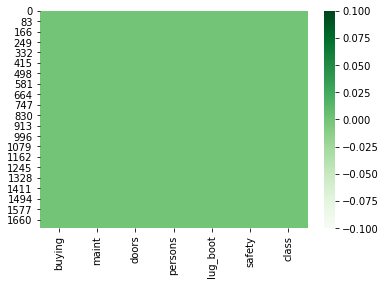

In [9]:
# let's visualize null values using heatmap

sns.heatmap(car.isnull(),cmap='Greens')

# from the below heatmap we can say that missing values not present in the dataset

In [10]:
# let's check As all the columns are categorical, check for unique values of each column

for i in car.columns:
    print(car[i].unique(),"\t",car[i].nunique())

['vhigh' 'high' 'med' 'low'] 	 4
['vhigh' 'high' 'med' 'low'] 	 4
['2' '3' '4' '5more'] 	 4
['2' '4' 'more'] 	 3
['small' 'med' 'big'] 	 3
['low' 'med' 'high'] 	 3
['unacc' 'acc' 'vgood' 'good'] 	 4


In [11]:
# Check how these unique categories are distributed among the columns
for i in car.columns:
    print(car[i].value_counts())
    print('\n')
    
# as per the below data we can say that all the columns except class distributed equally.

low      432
high     432
vhigh    432
med      432
Name: buying, dtype: int64


low      432
high     432
vhigh    432
med      432
Name: maint, dtype: int64


5more    432
2        432
4        432
3        432
Name: doors, dtype: int64


more    576
2       576
4       576
Name: persons, dtype: int64


big      576
small    576
med      576
Name: lug_boot, dtype: int64


low     576
high    576
med     576
Name: safety, dtype: int64


unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64




# Key Observation :-
- The car dataset has 1728 rows with 7  features.
- in which class feature name is our dependent variable.
- the heatmap and data information confirms , their is no missing values in the dataset 
- we seen above at class Feature, we notice that only 384 acc car out of 1728.
- all columns categorical in nature

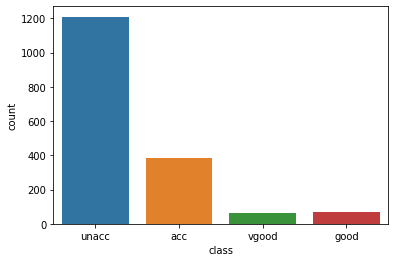

In [12]:
# Let's see  at the Class variable to know whether the dataset balance or not 

sns.countplot(x='class',data=car)

# from the below graph we can say that the target varible 'class' is unbalanced because no. of unacc value is high. 
# So, this is an unbalanced multiclass classification problem

# Bivariate analysis - tacking two column or two variable and looking the relationship between them,and also find correlation and covariance within two variable

Text(0.5, 1.0, 'Class/buying')

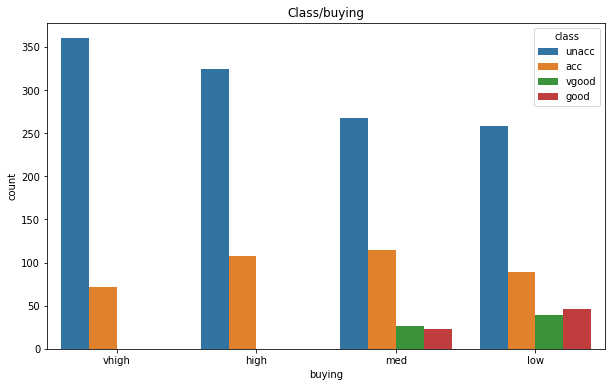

In [13]:
# lets check how the class feature distributed with other features in the dataset

plt.figure(figsize=(10,6))
sns.countplot(x='buying',hue='class',data=car)
plt.title("Class/buying")

# as per the below graph we say that acc class acceptability is high where buying price is medium as compare very high buying price
# and also vgood and good class acceptability high where buying price is low

Text(0.5, 1.0, 'Class with maintenance Price')

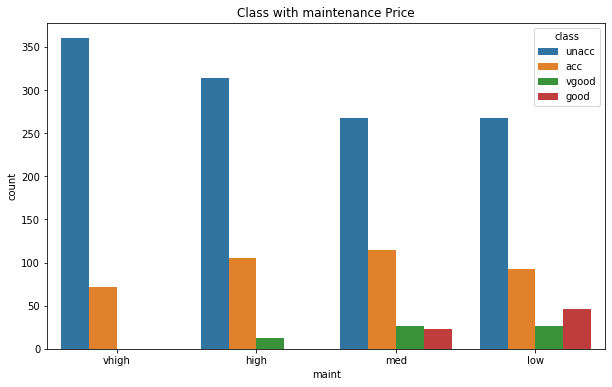

In [14]:
# lets check how the class feature distributed with other features in the dataset

plt.figure(figsize=(10,6))
sns.countplot(x='maint',hue='class',data=car)
plt.title("Class with maintenance Price")

# as per the below graph we say that acc class acceptability is high whether maintenance price is medium as compare very high buying price
# and also good class acceptability high where maintenance price is low

Text(0.5, 1.0, 'no. of doors')

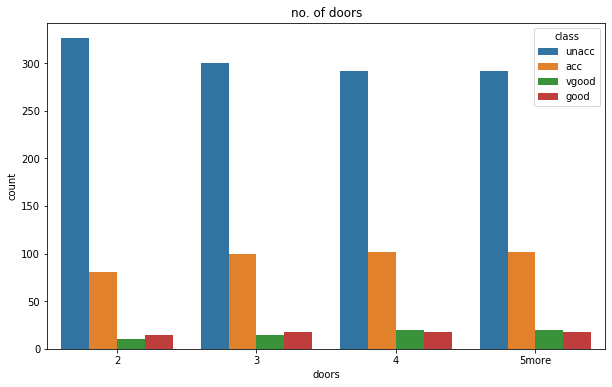

In [15]:
# lets check how the class feature distributed with other features in the dataset

plt.figure(figsize=(10,6))
sns.countplot(x='doors',hue='class',data=car)
plt.title("no. of doors")

# as per the below graph we say that acc class acceptability is low where car has 2  doors. 

Text(0.5, 1.0, 'No. of persons')

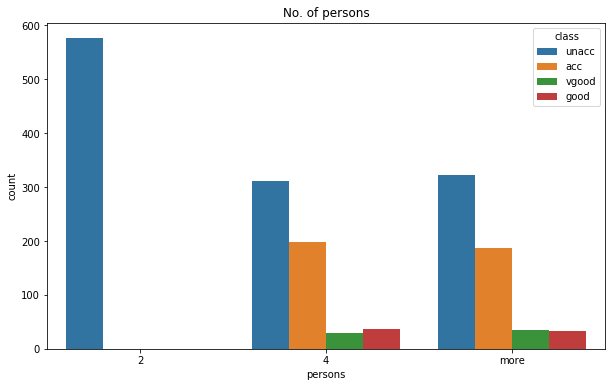

In [16]:
# lets check how the class feature distributed with other features in the dataset

plt.figure(figsize=(10,6))
sns.countplot(x='persons',hue='class',data=car)
plt.title("No. of persons")

# as per the below graph we say that unacc class is high whether  persons capacity is 2 as compare 4 persons.
# and acc car class is high whether persons carring capacity is 4 or more.

Text(0.5, 1.0, 'luggage boot')

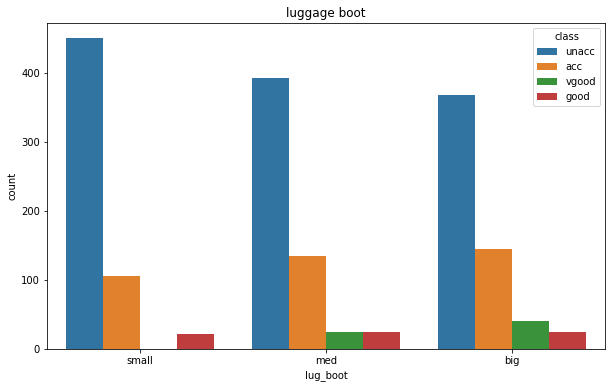

In [17]:
# lets check how the class feature distributed with other features in the dataset

plt.figure(figsize=(10,6))
sns.countplot(x='lug_boot',hue='class',data=car)
plt.title("luggage boot")

# as per the below graph we say that the luggage boot size is big in the class acc and vgood.
# as compare small luggage boot counts

Text(0.5, 1.0, 'Class vs Safety')

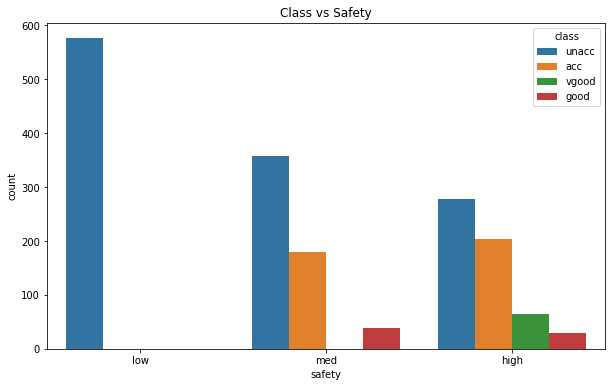

In [18]:
# lets check how the class feature distributed with other features in the dataset

plt.figure(figsize=(10,6))
sns.countplot(x='safety',hue='class',data=car)
plt.title("Class vs Safety")

# as per the below graph we say that the safety of the car is high in acc and vgood class as compare unacc class

In [19]:
# let's convert categotrical values into numeric
le=LabelEncoder()

for col in car.columns:
    car[col]=le.fit_transform(car[col])

In [20]:
# let's check whether it is converted or not
car.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [21]:
# let's get correlation of dataset with each other
data= car.corr()
data

,buying,maint,doors,persons,lug_boot,safety,class
buying,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.051424
maint,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.040194
doors,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-0.031327
persons,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-0.299468
lug_boot,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.033184
safety,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.021044
class,0.051424,0.040194,-0.031327,-0.299468,0.033184,-0.021044,1.000000


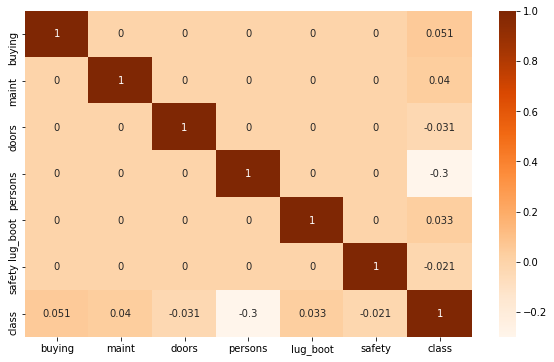

In [22]:
# heatmap of all features on dataset with each other

plt.figure(figsize=(10,6))
sns.heatmap(data,cmap='Oranges',annot=True) 

# key observation 

- dark shades are highly correlated with each other
- class is highly positive correlated with buying.
- class is negative correlated with persons
- Other columns except 'class' shows no correlation with each other.

<Figure size 1440x1152 with 0 Axes>

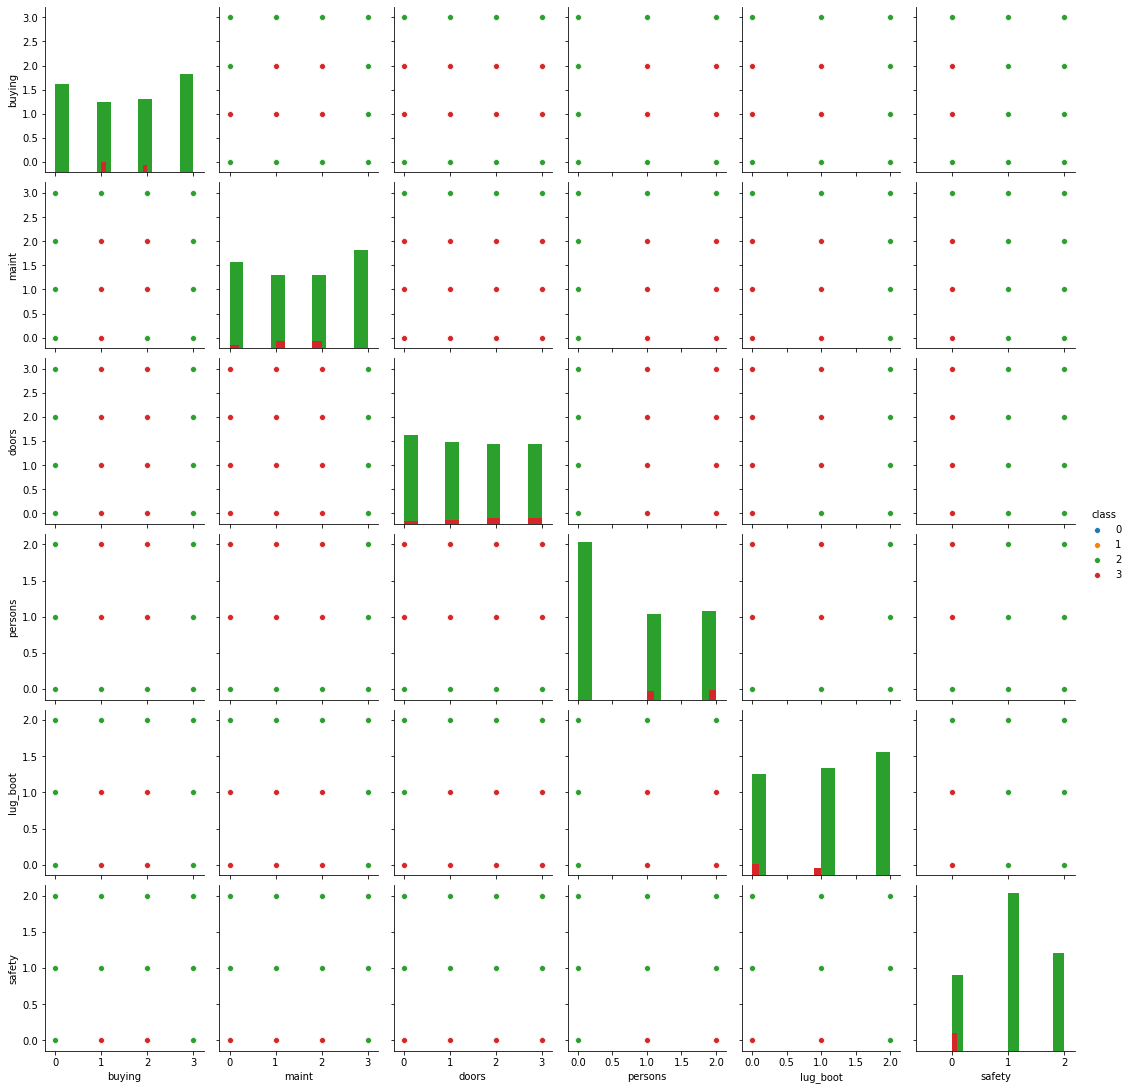

In [23]:
# let's plot pair plot to get more understanding

plt.figure(figsize=(20,16))
sns.pairplot(hue='class',data=car, diag_kind='hist')

In [24]:
#Now seperate the dataset as input variable and output variabes

x = car.drop('class', axis = 1)
y = car['class']

In [25]:
# let's check shape x and y
print(x.shape)
print(y.shape)

(1728, 6)
(1728,)


In [26]:
#Applying Standard scaling to get optimized result
#Lets bring features to common scale 

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_x = sc.fit_transform(x)
df_x =pd.DataFrame(df_x,columns=x.columns)

In [27]:
df_x

,buying,maint,doors,persons,lug_boot,safety
0,1.341641,1.341641,-1.341641,-1.224745,1.224745,0.000000
1,1.341641,1.341641,-1.341641,-1.224745,1.224745,1.224745
2,1.341641,1.341641,-1.341641,-1.224745,1.224745,-1.224745
3,1.341641,1.341641,-1.341641,-1.224745,0.000000,0.000000
4,1.341641,1.341641,-1.341641,-1.224745,0.000000,1.224745
...,...,...,...,...,...,...
1723,-0.447214,-0.447214,1.341641,1.224745,0.000000,1.224745
1724,-0.447214,-0.447214,1.341641,1.224745,0.000000,-1.224745
1725,-0.447214,-0.447214,1.341641,1.224745,-1.224745,0.000000
1726,-0.447214,-0.447214,1.341641,1.224745,-1.224745,1.224745


# Our training and testing data is ready now to perform machine learning algorithm¶

## the car class prediction is a multiclass classification problem , so we can use Multiple classification algorithm with hyperparameter tune gridsearch and random search.


##  We will use the following algorithms

- Logistic Regression
- knn
- DecisionTrees
- Random Forests
- SVM
- naviebyes

In [28]:
# Since we have target imbalance so we focus roc_auc_score and cross validation score
# Train and Test splitting of data 

df_x_train, df_x_test, y_train, y_test = train_test_split(df_x, y, test_size = 0.22, random_state = 42)  

In [29]:
print(df_x_train.shape)
print(y_train.shape)

(1347, 6)
(1347,)


In [30]:
print(df_x_test.shape)
print(y_test.shape)

(381, 6)
(381,)


In [31]:
# let's make function to run multiple algorithm
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

def max_accuracyscore(modal,df_x,y):
    max_accuracy_score=0
    for r_state in range(42,100):
        df_x_train, df_x_test, y_train, y_test = train_test_split(df_x, y, test_size = 0.22, random_state = r_state)  
        modal.fit(df_x_train,y_train)
        y_pred = modal.predict(df_x_test)
        a_score=accuracy_score(y_test,y_pred)
        if a_score>max_accuracy_score:
            max_accuracy_score=a_score
            final_r_state=r_state
    print("max Accuracy_Score corresponding to ",final_r_state," is ",max_accuracy_score)
    return final_r_state

In [32]:
#Lets use logistic regression and check 
from sklearn.linear_model import LogisticRegression

lg=LogisticRegression()
max_accuracyscore(lg,df_x,y)

max Accuracy_Score corresponding to  73  is  0.7349081364829396


73

In [33]:
# Lets use cross validation metod to get cross val score because target varible is imbalanced
from sklearn.model_selection import cross_val_score

print("Mean accuracy score for Logistic Regression: ",cross_val_score(lg,df_x,y,cv=5,scoring="accuracy").mean())
print("standard deviation in accuracy score for Logistic Regression: ",cross_val_score(lg,df_x,y,cv=5,scoring="accuracy").std())
print('\n')
print('cross val accuracy score:',cross_val_score(lg,df_x,y,cv=5,scoring="accuracy"))


Mean accuracy score for Logistic Regression:  0.6493407053698584
standard deviation in accuracy score for Logistic Regression:  0.02950858841948846


cross val accuracy score: [0.63583815 0.65028902 0.60115607 0.67826087 0.68115942]


In [34]:
#Lets use KNN
#For KNN we need to know the best value of n_neighbors using grid search

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn =KNeighborsClassifier()
neighbors={"n_neighbors":range(1,30)}
Gv = GridSearchCV(knn, neighbors, cv=5,scoring="accuracy",n_jobs=-1)
Gv.fit(df_x,y)
Gv.best_params_

{'n_neighbors': 1}

In [35]:
knn =KNeighborsClassifier(n_neighbors=1)
max_accuracyscore(knn,df_x,y)

max Accuracy_Score corresponding to  42  is  0.9422572178477691


42

In [36]:
#  lets check cross val score and mean accuracy of cross val score
print("Mean accuracy score for KNeighbors: ",cross_val_score(knn,df_x,y,cv=5,scoring="accuracy").mean())
print("standard deviation in accuracy score for Kneighbors: ",cross_val_score(knn,df_x,y,cv=5,scoring="accuracy").std())
print('\n')
print('cross val accuracy score:',cross_val_score(knn,df_x,y,cv=5,scoring="accuracy"))


Mean accuracy score for KNeighbors:  0.8444232219150539
standard deviation in accuracy score for Kneighbors:  0.11230011042062851


cross val accuracy score: [0.6416185  0.81791908 0.91040462 0.88405797 0.96811594]


In [37]:
# lets use randomForest classifiers 
#Grid search can be used to improve any specific evaluation metric.

parameters={"n_estimators":[10,100,500]}
rf=RandomForestClassifier()
Gcv = GridSearchCV(rf, parameters, cv=5,scoring="accuracy",n_jobs=-1)
Gcv.fit(df_x,y)
Gcv.best_params_

{'n_estimators': 100}

In [38]:
rf=RandomForestClassifier(n_estimators=100)
max_accuracyscore(rf,df_x,y)

max Accuracy_Score corresponding to  61  is  0.9973753280839895


61

In [39]:
# lets check cross val score and mean accuracy of cross val score
print("Mean accuracy score for RandomForest: ",cross_val_score(rf,df_x,y,cv=5,scoring="accuracy").mean())
print("standard deviation in accuracy score for RandomForest: ",cross_val_score(rf,df_x,y,cv=5,scoring="accuracy").std())
print('\n')
print('cross val score RandomForest:',cross_val_score(rf,df_x,y,cv=5,scoring="accuracy"))


Mean accuracy score for RandomForest:  0.8334204574013573
standard deviation in accuracy score for RandomForest:  0.09417818322237187


cross val score RandomForest: [0.6416185  0.80346821 0.84393064 0.86086957 0.94202899]


In [40]:
# Lets use SVM with gridsearch cv to select best parameter
from sklearn.svm import SVC
svc=SVC()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
gv = GridSearchCV(svc, parameters, cv=5,scoring="accuracy",n_jobs=-1)
gv.fit(df_x,y)
gv.best_params_

{'C': 10, 'kernel': 'rbf'}

In [41]:
svc=SVC(kernel="rbf",C=10)
max_accuracyscore(svc,df_x,y)

max Accuracy_Score corresponding to  51  is  1.0


51

In [42]:
# lets check cross val score and mean accuracy of cross val score because svc model satrt overfitting

print("Mean accuracy score for SVC: ",cross_val_score(svc,df_x,y,cv=5,scoring="accuracy").mean())
print("standard deviation in accuracy score for SVC: ",cross_val_score(svc,df_x,y,cv=5,scoring="accuracy").std())
print('\n')
print('cross val accuracy score:',cross_val_score(svc,df_x,y,cv=5,scoring="accuracy"))

Mean accuracy score for SVC:  0.8831364664488565
standard deviation in accuracy score for SVC:  0.042664166670955427


cross val accuracy score: [0.81791908 0.87572254 0.89595376 0.87536232 0.95072464]


# I used multiple algorithms to  get highest accuracy score corresponding to random state

- we seen till now svc(kernal=rbf) is best model as comparision to other model which are apply in this  because we got max mean accuracy score is 88%.

- So we save model SVC for production.


In [43]:
# let's create final model
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state =51,test_size=0.22)
svc=SVC(kernel="rbf",C=10,probability=True)
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
a_score=accuracy_score(y_test,y_pred)
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))

Confusion matrix 
 [[ 87   0   0   1]
 [  0  19   0   0]
 [  2   0 262   0]
 [  1   0   0   9]]
classification report 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        88
           1       1.00      1.00      1.00        19
           2       1.00      0.99      1.00       264
           3       0.90      0.90      0.90        10

    accuracy                           0.99       381
   macro avg       0.97      0.97      0.97       381
weighted avg       0.99      0.99      0.99       381



In [44]:
print("Mean accuracy score for KNeighbors: ",cross_val_score(svc,df_x,y,cv=5,scoring="accuracy").mean())
print("standard deviation in accuracy score for Kneighbors: ",cross_val_score(svc,df_x,y,cv=5,scoring="accuracy").std())
print('\n')
print('cross val accuracy score:',cross_val_score(svc,df_x,y,cv=5,scoring="accuracy"))


Mean accuracy score for KNeighbors:  0.8831364664488565
standard deviation in accuracy score for Kneighbors:  0.042664166670955427


cross val accuracy score: [0.81791908 0.87572254 0.89595376 0.87536232 0.95072464]


In [45]:
from sklearn.externals import joblib

# save the model as a pickle in a file

joblib.dump(svc,'Car_Evaluation.pkl')

['Car_Evaluation.pkl']